In [53]:
#Read in the necessary packages
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import geopandas as gpd
import shapely
import numpy as np

import arcgis
import arcgis.geoanalytics
from arcgis.gis import GIS

from pathlib import Path
from zipfile import ZipFile
import os
%matplotlib inline
pd.options.display.max_columns = None
#https://maps.cityofmadison.com/arcgis/rest/services/Public/OPEN_DATA_ENGR/MapServer/1

In [2]:
#read in the bus stops and the streets
busstops = gpd.read_file('https://opendata.arcgis.com/datasets/58d6ef381b594afbb06862dc51480aa1_3.geojson')
streets = gpd.read_file('https://opendata.arcgis.com/datasets/55a0bff60c3b475893c6f483dd53cd40_1.geojson')

In [3]:
type(busstops)

geopandas.geodataframe.GeoDataFrame

In [4]:
type(streets)

geopandas.geodataframe.GeoDataFrame

In [5]:
busstops.shape

(2156, 26)

In [6]:
busstops.columns

Index(['OBJECTID', 'stop_id', 'stop_code', 'stop_name', 'stop_desc',
       'stop_lat', 'stop_lon', 'agency_id', 'location_type', 'parent_station',
       'wheelchair_boarding', 'Route', 'Route_Dir', 'Shelter', 'Bench',
       'Schedule', 'Light', 'Reaitime', 'PK_MD_WE', 'jurisdiction_id',
       'relative_position', 'cardinal_direction', 'primary_street',
       'address_range', 'cross_location', 'geometry'],
      dtype='object')

In [7]:
streets.shape

(10004, 61)

In [20]:
stop_1 = busstops.iloc[213, :]
stop_2 = busstops.iloc[214, :]
stops = busstops.iloc[213:215, :]
print(stop_1['Route'])
print(stop_2['Route'])
print(stops['Route'])

4, 47
4, 47
213    4, 47
214    4, 47
Name: Route, dtype: object


In [26]:
print(stop_1['stop_id'], stop_2['stop_id'])
print(stops['stop_id'])

843 845
213    843
214    845
Name: stop_id, dtype: int64


In [12]:
from bus import haversine_miles

In [14]:
crow_flies = haversine_miles(stop_1['stop_lat'], stop_1['stop_lon'], stop_2['stop_lat'], stop_2['stop_lon'])
print(crow_flies, ' miles')

0.18138390955552192  miles


In [15]:
streets.columns

Index(['OBJECTID', 'segment_id', 'segment_name', 'from_segment', 'to_segment',
       'pvmt_rating', 'curb_rating', 'init_const_yr', 'municipality',
       'speed_limit', 'travel_time', 'emergency_spd1', 'funct_class',
       'surface_type', 'surface_year', 'surface_width', 'project_no', 'lanes',
       'curb_gutter', 'truck_route', 'median_width', 'oneway', 'rw_width',
       'shoulder_right', 'shoulder_left', 'alternate_name', 'maintained_by',
       'maint_factor', 'city_maintains', 'comments', 'r_lo_addr', 'r_hi_addr',
       'l_lo_addr', 'l_hi_addr', 'ald_dist', 'sidewalk', 'resurface',
       'next_maint_type', 'seal_coat', 'crack_seal', 'shoulder_type',
       'curb_type', 'median_type', 'Owner', 'Asset_ID', 'Date_recorded',
       'Date_modified', 'Modified_by', 'Recorded_by', 'Responsible_Agency',
       'Status', 'Struc_code', 'pvmt_rate_txt', 'curb_rate_txt', 'cross_slope',
       'terrace_erosion', 'Recon_year', 'rating_yr', 'rating_yr_txt',
       'ShapeSTLength', 'geometr

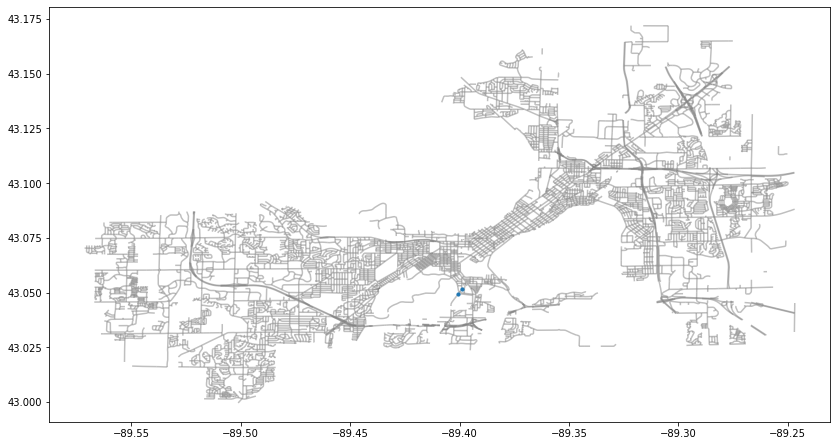

In [178]:
fig, ax = plt.subplots(figsize=(14,12))
markersize = 2
streets.plot(ax=ax,color='grey',alpha=.5)
stops.plot(ax=ax, markersize = 5*markersize, zorder=5)
#stop_1.plot(ax=ax, markersize = 5*markersize, zorder=5)
#stop_2.plot(ax=ax, markersize = markersize, color = 'red')

### Finding the Connecting Streets

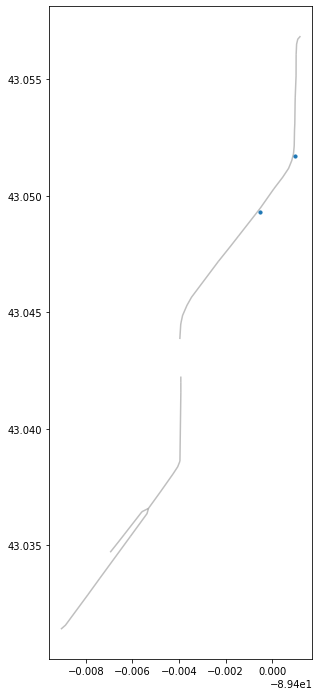

In [177]:
fig, ax = plt.subplots(figsize=(14,12))
markersize = 2
streets[streets['segment_name'].str.match('FISH HATCHERY')].plot(ax=ax,color='grey',alpha=.5)
stops.plot(ax=ax, markersize = 5*markersize, zorder=5)
#stop_1.plot(ax=ax, markersize = 5*markersize, zorder=5)
#stop_2.plot(ax=ax, markersize = markersize, color = 'red')

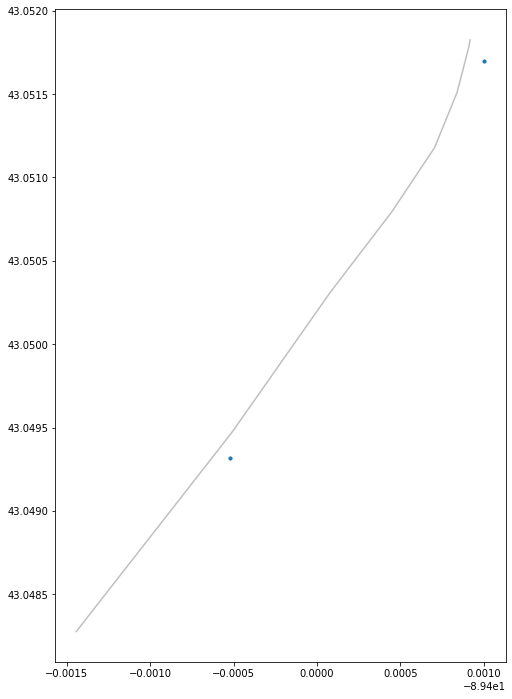

In [163]:
fig, ax = plt.subplots(figsize=(14,12))
markersize = 2
streets[streets['segment_name'].str.match('FISH HATCHERY')].iloc[7:10, :].plot(ax=ax,color='grey',alpha=.5)
stops.plot(ax=ax, markersize = 5*markersize, zorder=5)
#stop_1.plot(ax=ax, markersize = 5*markersize, zorder=5)
#stop_2.plot(ax=ax, markersize = markersize, color = 'red')

So the way geopandas is it is just gonna automatically grab the geometry section

In [27]:
type(streets.loc[1, 'geometry'])

shapely.geometry.linestring.LineString

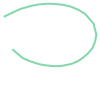

In [28]:
streets.loc[1, 'geometry']

In [29]:
str(streets.loc[1, 'geometry'])

'LINESTRING (-89.29556166177211 43.13743813233985, -89.2951764019182 43.13761970185675, -89.29506980364941 43.13764899323517, -89.29493696851468 43.13768759653242, -89.29475800921399 43.13772280542427, -89.2945353102226 43.13773918935953, -89.29437119005532 43.13773206211384, -89.29419258039373 43.13771368618286, -89.29401472626446 43.1376707895877, -89.29384301791374 43.13759841165848, -89.2936865798481 43.1375008426004, -89.29349621740027 43.13728183427509, -89.29343282373414 43.13703176399765, -89.29345914488192 43.13687189745466, -89.29351822434852 43.13672184361699, -89.29362033175292 43.13660047361395, -89.29373713958687 43.13650021008662, -89.2938487521609 43.1364221441148, -89.2939919395609 43.13635843386015, -89.29417792849915 43.13631765883942, -89.29430041300525 43.13630244907981, -89.29444135630214 43.13630509512427, -89.29462089367675 43.13632578404953, -89.29474493777677 43.13634907073488, -89.29495037516618 43.13641368640056, -89.29512582179441 43.13648949709118, -89.295

In [30]:
stops

,OBJECTID,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,agency_id,location_type,parent_station,wheelchair_boarding,Route,Route_Dir,Shelter,Bench,Schedule,Light,Reaitime,PK_MD_WE,jurisdiction_id,relative_position,cardinal_direction,primary_street,address_range,cross_location,geometry
213,10849,843,0843,Fish Hatchery & Appleton (NB),This stop (#0843) is northbound on the 1347 bl...,43.051698,-89.399002,MMT,0,NaN,1,"4, 47",None,1,0,1,0,0,111,CMAD,3,0.0,Fish Hatchery,1347,Appleton,POINT (-89.39900 43.05170)
214,10850,845,0845,Fish Hatchery & Plaenert (NB),This stop (#0845) is northbound on the 1701 bl...,43.049317,-89.400521,MMT,0,NaN,1,"4, 47",None,0,0,0,0,0,111,CMAD,3,0.0,Fish Hatchery,1701,Plaenert,POINT (-89.40052 43.04932)


In [36]:
streets[streets['segment_name'].str.match('FISH HATCHERY')].shape

(23, 61)

In [61]:
#So we can take the segments we are graphing up there and try to find their length
np.sum(streets[streets['segment_name'].str.match('FISH HATCHERY')].iloc[6:10, :].length)

0.005561901618039791

In [159]:
#Now we know we need 6 to 10 to really connect the stops
FS_segments = streets[streets['segment_name'].str.match('FISH HATCHERY')].iloc[6:10, :].reset_index()

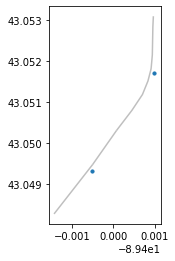

In [145]:
fig, ax = plt.subplots(figsize=(5,4))
markersize = 2
FS_segments.plot(ax=ax,color='grey',alpha=.5)
stops.plot(ax=ax, markersize = 5*markersize, zorder=5)

### Cutting the Street at Stop 1

In [143]:
#Determine closest segment to stop 1
FS_segments['geometry'].distance(stop_1['geometry'])

0    0.000152
1    0.000106
2    0.001673
3    0.002688
dtype: float64

In [128]:
#Now know index 1 is closest to stop_1
d = FS_segments.loc[1, 'geometry'].project(stop_1['geometry'])
#Same thing as this because ls_point is nearest point on linestring
#d = FS_segment_1.project(ls_point)
print(d)

0.00010504271073492628


In [129]:
ls_split1, ls_split2 = cut(FS_segments.loc[1, 'geometry'], d)

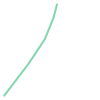

In [130]:
#Just know from experience that split2 is what we want
ls_split2

##### Major Python Scope Question

In [160]:
#modified_FS_segments = None
#modified_FS_segments = FS_segments
FS_segments.loc[1, 'geometry'] = ls_split2
print(str(FS_segments.loc[1, 'geometry']))
#print(str(modified_FS_segments.loc[1, 'geometry']))

LINESTRING (-89.39910428063044 43.05172705739599, -89.39916073138157 43.05150943379275, -89.39929512213013 43.0511795476117, -89.39955061349268 43.05079597598084, -89.39992538459353 43.05030524871177)


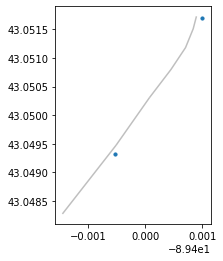

In [164]:
#Plotting truncated line and want to get rid of segment 0
fig, ax = plt.subplots(figsize=(5,4))
markersize = 2
FS_segments[1:].plot(ax=ax,color='grey',alpha=.5)
stops.plot(ax=ax, markersize = 5*markersize, zorder=5)

### Cutting the Street at Stop 2

In [165]:
#Determine closest segment to stop 1
FS_segments['geometry'].distance(stop_2['geometry'])

0    0.002893
1    0.001151
2    0.000155
3    0.000086
dtype: float64

In [167]:
#Now know index 3 is closest to stop_2
d2 = FS_segments.loc[3, 'geometry'].project(stop_2['geometry'])
print(d2)

0.000129331733434878


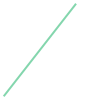

In [168]:
FS_segments.loc[3, 'geometry']

In [169]:
ls_split3, ls_split4 = cut(FS_segments.loc[3, 'geometry'], d2)

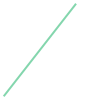

In [170]:
ls_split3

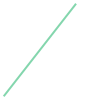

In [171]:
ls_split4

In [172]:
print(str(FS_segments.loc[3, 'geometry']))

LINESTRING (-89.40050852056855 43.04947428820282, -89.40144679738786 43.0482735817796)


In [173]:
FS_segments.loc[3, 'geometry'] = ls_split3
print(str(FS_segments.loc[3, 'geometry']))

LINESTRING (-89.40050852056855 43.04947428820282, -89.40058815473377 43.0493723809067)


In [174]:
str(ls_split3)

'LINESTRING (-89.40050852056855 43.04947428820282, -89.40058815473377 43.0493723809067)'

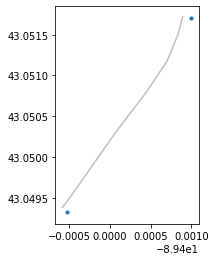

In [175]:
#Plotting truncated line and want to get rid of segment 0
fig, ax = plt.subplots(figsize=(5,4))
markersize = 2
FS_segments[1:].plot(ax=ax,color='grey',alpha=.5)
stops.plot(ax=ax, markersize = 5*markersize, zorder=5)

In [176]:
#Calculate the length of my new line segment previously 0.005561901618039791
np.sum(FS_segments.loc[1: , 'geometry'].length)

0.00280386455204966

### Collective Fiddling to get the street distance between two stops

In [77]:
from shapely.ops import nearest_points
??nearest_points

In [79]:
str(stop_1['geometry'])

'POINT (-89.39900126249367 43.05170033487548)'

In [155]:
str(FS_segments.loc[1, 'geometry'])

'LINESTRING (-89.39908177054843 43.05182957477325, -89.39909037064646 43.05178068185227, -89.39916073138157 43.05150943379275, -89.39929512213013 43.0511795476117, -89.39955061349268 43.05079597598084, -89.39992538459353 43.05030524871177)'

In [85]:
ls_point, stop_1_point = nearest_points(FS_segments.loc[1, 'geometry'], stop_1['geometry'])

In [86]:
str(ls_point)

'POINT (-89.39910428063044 43.05172705739599)'

In [87]:
str(stop_1_point)

'POINT (-89.39900126249367 43.05170033487548)'

In [88]:
FS_segment_1 = FS_segments.loc[1, 'geometry']
type(FS_segment_1)

shapely.geometry.linestring.LineString

In [89]:
from shapely.ops import split
??split

In [110]:
FS_segment_1.distance(ls_point) < 1e-8

True

In [111]:
split(FS_segment_1, ls_point)


ValueError: not enough values to unpack (expected 2, got 1)

In [108]:
FS_segment_1 == split_ls[0]

True

In [93]:
str(FS_segment_1)

'LINESTRING (-89.39908177054843 43.05182957477325, -89.39909037064646 43.05178068185227, -89.39916073138157 43.05150943379275, -89.39929512213013 43.0511795476117, -89.39955061349268 43.05079597598084, -89.39992538459353 43.05030524871177)'

In [91]:
str(split_ls)

'GEOMETRYCOLLECTION (LINESTRING (-89.39908177054843 43.05182957477325, -89.39909037064646 43.05178068185227, -89.39916073138157 43.05150943379275, -89.39929512213013 43.0511795476117, -89.39955061349268 43.05079597598084, -89.39992538459353 43.05030524871177))'

In [94]:
type(split_ls)

shapely.geometry.collection.GeometryCollection

In [95]:
len(split_ls)

1

In [96]:
split_ls.wkt

'GEOMETRYCOLLECTION (LINESTRING (-89.39908177054843 43.05182957477325, -89.39909037064646 43.05178068185227, -89.39916073138157 43.05150943379275, -89.39929512213013 43.0511795476117, -89.39955061349268 43.05079597598084, -89.39992538459353 43.05030524871177))'

In [106]:
FS_segment_1.distance(stop_1_point) < 1e-8

False

In [98]:
len(split_ls.wkt)

259

In [100]:
FS_segment_1.length

0.0017644189242836323

In [104]:
split_ls[0].length

0.0017644189242836323

The problem we have here is that split only will apply at the vertex of a linestring. So we need to bring in this **cut** function (below)

In [116]:
#Bring in function for cutting linestrings with points NOT at vertex
from shapely.geometry import Point, LineString
def cut(line, distance):
    # Cuts a line in two at a distance from its starting point
    if distance <= 0.0 or distance >= line.length:
        return [LineString(line)]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p))
        if pd == distance:
            return [
                LineString(coords[:i+1]),
                LineString(coords[i:])]
        if pd > distance:
            cp = line.interpolate(distance)
            return [
                LineString(coords[:i] + [(cp.x, cp.y)]),
                LineString([(cp.x, cp.y)] + coords[i:])]

In [114]:
#Straight from shapely documentation
#line.project Returns the distance along this geometric object to a point nearest the other object.
d = FS_segment_1.project(stop_1_point)
#Same thing as this because ls_point is nearest point on linestring
#d = FS_segment_1.project(ls_point)
#print(d)

0.00010504271073070582


In [118]:
split_ls1, split_ls2 = cut(FS_segment_1, d)

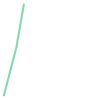

In [119]:
split_ls1

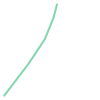

In [120]:
split_ls2

In [121]:
str(split_ls1)

'LINESTRING (-89.39908177054843 43.05182957477325, -89.39909037064646 43.05178068185227, -89.39910428063044 43.05172705739599)'

In [122]:
str(split_ls2)

'LINESTRING (-89.39910428063044 43.05172705739599, -89.39916073138157 43.05150943379275, -89.39929512213013 43.0511795476117, -89.39955061349268 43.05079597598084, -89.39992538459353 43.05030524871177)'

In [123]:
print(FS_segment_1.length)
print(split_ls2.length)

0.0017644189242836323
0.0016593762135529264


In [124]:
split_ls1.distance(stop_1_point)

0.000106427579159963

In [125]:
split_ls2.distance(stop_1_point)

0.00010642757915996302